In [8]:
# Downloading and preparing stock data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

start_date = '2010-01-01'
end_date = '2020-01-01'
ticker = 'INVE-B.ST'
df = yf.download(ticker,start_date,end_date)

df = df.reset_index()
df = df.drop('Date',1)
df

[*********************100%***********************]  1 of 1 completed


C:\Users\Henke\AppData\Local\Temp\ipykernel_10668\2512656462.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('Date',1)


,Open,High,Low,Close,Adj Close,Volume
0,33.375000,33.875000,33.375000,33.825001,23.078619,6739900
1,33.875000,34.099998,33.775002,34.000000,23.198015,2981928
2,33.724998,34.224998,33.674999,33.900002,23.129789,6745776
3,34.049999,34.099998,33.750000,33.950001,23.163902,5780292
4,34.125000,34.250000,33.900002,33.950001,23.163902,5140340
...,...,...,...,...,...,...
2506,128.750000,129.199997,128.149994,128.750000,121.449608,4504532
2507,128.750000,130.399994,128.500000,130.300003,122.911728,3953260
2508,130.300003,130.399994,129.550003,129.850006,122.487251,2428236
2509,130.000000,130.250000,129.250000,129.399994,122.062744,2715684


<AxesSubplot: >

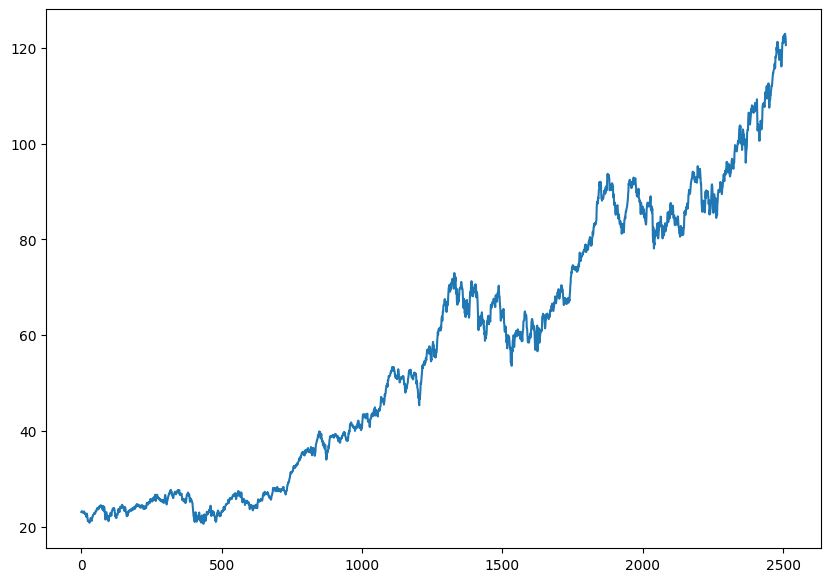

In [21]:
# Extract the relevant columns from the DataFrame
X = df[['Open', 'High', 'Low', 'Close', 'Volume']]
y = df['Adj Close']


y.plot(figsize=(10,7))


In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the SVM model on the training data
reg = SVR(kernel='linear').fit(X_train, y_train)

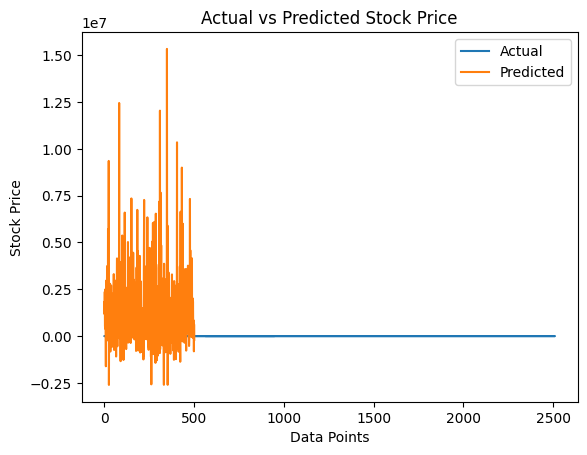

In [28]:
# Use the trained model to make predictions on the test data
y_pred = reg.predict(X_test)

# Plot the actual vs predicted stock prices

plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.xlabel('Data Points')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Price')
plt.show()